In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string
import os

In [2]:
os.getcwd()

'/Users/oraff/Downloads'

In [3]:
df = pd.read_csv('AfterEDAChiCrime.csv')

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Unnamed: 0,ID,Date,Primary Type,Arrest,Domestic,District Name,Average Daily Wind Speed Mph,Fastest mile Wind Speed time,Peak gust time,...,Fog/Ice Fog,Heavy Fog,Thunder,Hail,Smoke/Haze,Tornado,Year,Month,Day_name,Severity
0,0,11109587,2001-01-01,DECEPTIVE PRACTICE,0,0,Rogers Park,7.38,1519.0,1518.0,...,0,0,0,0,0,0,2001,January,Monday,0
1,1,1780042,2001-01-01,OTHER OFFENSE,0,0,Morgan Park,7.38,1519.0,1518.0,...,0,0,0,0,0,0,2001,January,Monday,0
2,2,5691515,2001-01-01,THEFT,0,0,Englewood,7.38,1519.0,1518.0,...,0,0,0,0,0,0,2001,January,Monday,0
3,3,5233406,2001-01-01,THEFT,1,0,Near West,7.38,1519.0,1518.0,...,0,0,0,0,0,0,2001,January,Monday,1
4,4,1310513,2001-01-01,THEFT,0,0,Ogden,7.38,1519.0,1518.0,...,0,0,0,0,0,0,2001,January,Monday,0


In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
#Start to create dummy feature for all object features.
df1 = df['Primary Type'].str.get_dummies()

In [7]:
df = pd.concat([df, df1], axis=1)

df.head()

,ID,Date,Primary Type,Arrest,Domestic,District Name,Average Daily Wind Speed Mph,Fastest mile Wind Speed time,Peak gust time,Percipitation,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
0,11109587,2001-01-01,DECEPTIVE PRACTICE,0,0,Rogers Park,7.38,1519.0,1518.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1780042,2001-01-01,OTHER OFFENSE,0,0,Morgan Park,7.38,1519.0,1518.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,5691515,2001-01-01,THEFT,0,0,Englewood,7.38,1519.0,1518.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,5233406,2001-01-01,THEFT,1,0,Near West,7.38,1519.0,1518.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,1310513,2001-01-01,THEFT,0,0,Ogden,7.38,1519.0,1518.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [8]:
df2 = df['District Name'].str.get_dummies()

In [9]:
df = pd.concat([df, df2], axis=1)

df.head()

,ID,Date,Primary Type,Arrest,Domestic,District Name,Average Daily Wind Speed Mph,Fastest mile Wind Speed time,Peak gust time,Percipitation,...,Lincoln,Morgan Park,Near North,Near West,Ogden,Rogers Park,Shakespeare,South Chicago,Town Hall,Wentworth
0,11109587,2001-01-01,DECEPTIVE PRACTICE,0,0,Rogers Park,7.38,1519.0,1518.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,1780042,2001-01-01,OTHER OFFENSE,0,0,Morgan Park,7.38,1519.0,1518.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,5691515,2001-01-01,THEFT,0,0,Englewood,7.38,1519.0,1518.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,5233406,2001-01-01,THEFT,1,0,Near West,7.38,1519.0,1518.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,1310513,2001-01-01,THEFT,0,0,Ogden,7.38,1519.0,1518.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [10]:
df3 = df['Day_name'].str.get_dummies()

df = pd.concat([df, df3], axis=1)

df.head()

,ID,Date,Primary Type,Arrest,Domestic,District Name,Average Daily Wind Speed Mph,Fastest mile Wind Speed time,Peak gust time,Percipitation,...,South Chicago,Town Hall,Wentworth,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,11109587,2001-01-01,DECEPTIVE PRACTICE,0,0,Rogers Park,7.38,1519.0,1518.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,1780042,2001-01-01,OTHER OFFENSE,0,0,Morgan Park,7.38,1519.0,1518.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,5691515,2001-01-01,THEFT,0,0,Englewood,7.38,1519.0,1518.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,5233406,2001-01-01,THEFT,1,0,Near West,7.38,1519.0,1518.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,1310513,2001-01-01,THEFT,0,0,Ogden,7.38,1519.0,1518.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
df4 = df['Month'].str.get_dummies()

df = pd.concat([df, df4], axis=1)

df.head()

,ID,Date,Primary Type,Arrest,Domestic,District Name,Average Daily Wind Speed Mph,Fastest mile Wind Speed time,Peak gust time,Percipitation,...,December,February,January,July,June,March,May,November,October,September
0,11109587,2001-01-01,DECEPTIVE PRACTICE,0,0,Rogers Park,7.38,1519.0,1518.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,1780042,2001-01-01,OTHER OFFENSE,0,0,Morgan Park,7.38,1519.0,1518.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,5691515,2001-01-01,THEFT,0,0,Englewood,7.38,1519.0,1518.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,5233406,2001-01-01,THEFT,1,0,Near West,7.38,1519.0,1518.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,1310513,2001-01-01,THEFT,0,0,Ogden,7.38,1519.0,1518.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [12]:
#Getting a few more features based on datetime
df['Hour'] = df.Date.dt.hour
df['Day_of_year'] = df.Date.dt.dayofyear
df['Quarter'] = df.Date.dt.quarter

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
holidays = cal.holidays(start=df['Date'].min(), end=df['Date'].max())

df['Holiday'] = df['Date'].isin(holidays)


In [13]:
#now we can drop the useless columns
df = df.drop(columns=['ID', 'Primary Type', 'District Name', 'Month', 'Day_name', 'Date'], axis=1)

In [14]:
df.head()

,Arrest,Domestic,Average Daily Wind Speed Mph,Fastest mile Wind Speed time,Peak gust time,Percipitation,Snowfall,Snow depth,Average Temp,Max Temp,...,June,March,May,November,October,September,Hour,Day_of_year,Quarter,Holiday
0,0,0,7.38,1519.0,1518.0,0.0,0.0,17.0,20.0,26.0,...,0,0,0,0,0,0,0,1,1,True
1,0,0,7.38,1519.0,1518.0,0.0,0.0,17.0,20.0,26.0,...,0,0,0,0,0,0,0,1,1,True
2,0,0,7.38,1519.0,1518.0,0.0,0.0,17.0,20.0,26.0,...,0,0,0,0,0,0,0,1,1,True
3,1,0,7.38,1519.0,1518.0,0.0,0.0,17.0,20.0,26.0,...,0,0,0,0,0,0,0,1,1,True
4,0,0,7.38,1519.0,1518.0,0.0,0.0,17.0,20.0,26.0,...,0,0,0,0,0,0,0,1,1,True


In [15]:
df.columns

Index(['Arrest', 'Domestic', 'Average Daily Wind Speed Mph',
       'Fastest mile Wind Speed time', 'Peak gust time', 'Percipitation',
       'Snowfall', 'Snow depth', 'Average Temp', 'Max Temp',
       ...
       'June', 'March', 'May', 'November', 'October', 'September', 'Hour',
       'Day_of_year', 'Quarter', 'Holiday'],
      dtype='object', length=101)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6519152 entries, 0 to 6519151
Columns: 101 entries, Arrest to Holiday
dtypes: bool(1), float64(11), int64(89)
memory usage: 4.9 GB


In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [18]:
#created a 70k severe 70k nonsevere dataframe to split
df_severe = df[df.Severity != 0]
df_non = df[df.Severity != 1]
df_severe_70 = df_severe.sample(n=70000)
df_non_70 = df_non.sample(n=70000)
df_tnt = df_severe_70.append(df_non_70)

In [19]:
X = df_tnt.drop(columns=['Severity', 'Arrest'], axis=1)
y = df_tnt['Severity']


In [20]:
#test size was .3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)


In [21]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
#This code will help me keep only useful features
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [23]:
final_iv, IV = data_vars(X_train, y_train)

/Users/oraff/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
#any features that have a correlation between .008 and .8 will be in the model
features = list(IV[(IV['IV'] >= 0.008) & (IV['IV'] <= 0.8)]['VAR_NAME'])
X2 = X_train[features]

In [25]:
def iterate_vif(df, vif_threshold=5, max_vif=6):
  count = 0
  while max_vif > vif_threshold:
    count += 1
    print("Iteration # "+str(count))
    vif = pd.DataFrame()
    vif["VIFactor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["features"] = df.columns
    
    if vif['VIFactor'].max() > vif_threshold:
      print('Removing %s with VIF of %f' % (vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], vif['VIFactor'].max()))
      df = df.drop(vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], axis=1)
      max_vif = vif['VIFactor'].max()
    else:
        print('Complete')
        return df, vif.sort_values('VIFactor')
 
final_df, final_vif = iterate_vif(X2)

Iteration # 1
Complete


In [26]:
#set new features for train and test
X_train=final_df

In [27]:
X_test=X_test[X_train.columns]

In [28]:
#XGBcalssifier Model all parameters are same for all models
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100,learning_rate=.1, max_depth=10, seed=1)

In [29]:
xg_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1,
              silent=None, subsample=1, verbosity=1)

In [30]:
y_pred = xg_cl.predict(X_test)

In [31]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.8523010224706815

In [32]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)
conf

array([[20338,   617],
       [ 5597, 15448]])

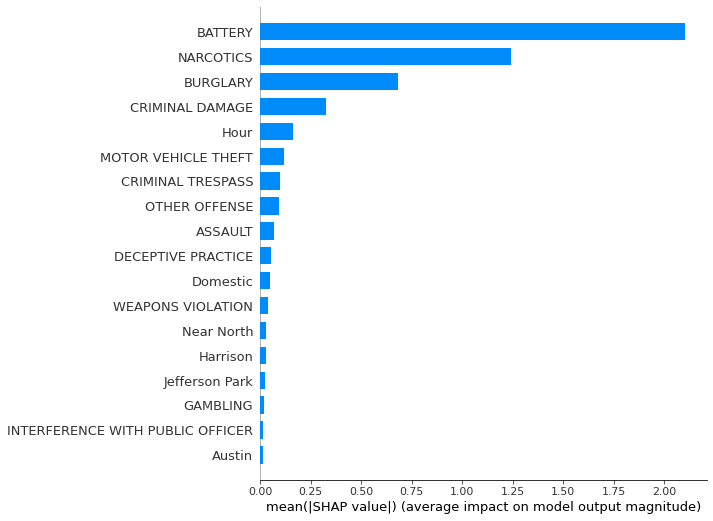

In [33]:
#use shap to get feature summary
import shap
shap_values = shap.TreeExplainer(xg_cl).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [34]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100, max_depth=10, random_state=5, )
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [35]:
y_pred1 = clf.predict(X_test)

In [36]:
roc_auc_score(y_test, y_pred1)

0.8494951762533604

In [37]:
conf = confusion_matrix(y_test, y_pred1)
conf

array([[20548,   407],
       [ 5926, 15119]])

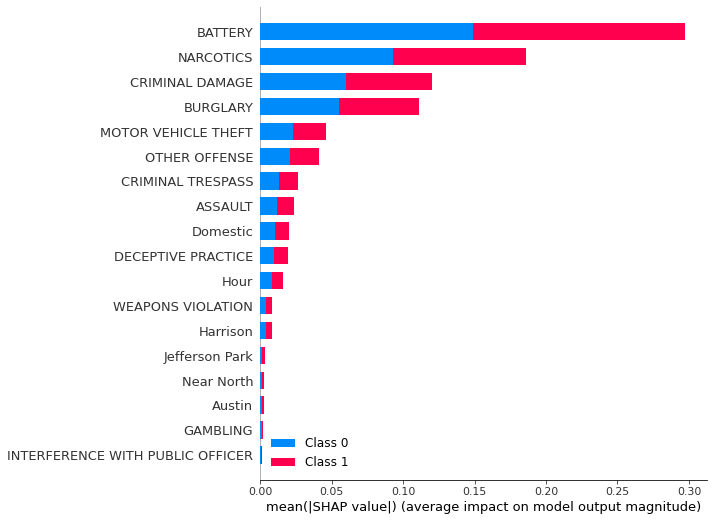

In [38]:
shap_values = shap.TreeExplainer(clf).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [40]:
#LightGbm here
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(max_depth=10, n_estimators=100, random_state=5)
lgb_clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=10,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [41]:
y_pred2 = lgb_clf.predict(X_test)

In [42]:
roc_auc_score(y_test, y_pred2)

0.8524702919554222

In [43]:
conf = confusion_matrix(y_test, y_pred2)
conf

array([[20367,   588],
       [ 5619, 15426]])

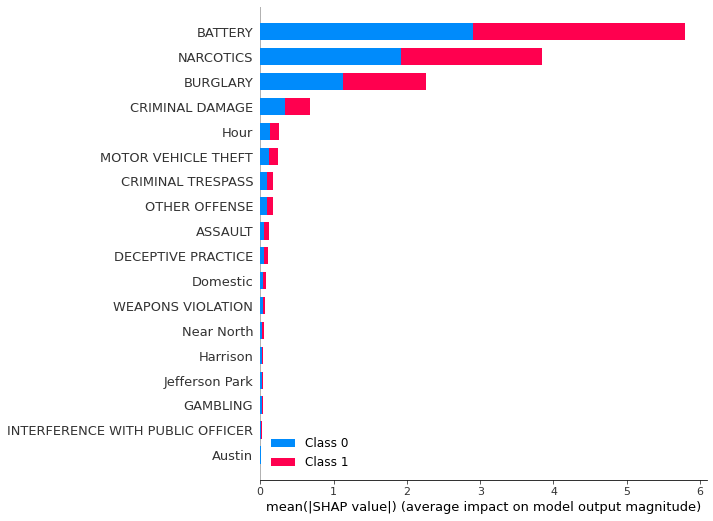

In [48]:
shap_values = shap.TreeExplainer(lgb_clf).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")
